In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## pandas' describe() function

$$X \sim \mathcal N(1,2^2)$$

In [9]:
x = 1.0 + 2.0 * np.random.randn(100000000)

In [10]:
dataset = pd.DataFrame(x)

In [11]:
dataset.head()

,0
0,1.362232
1,-0.087704
2,-0.256481
3,3.171572
4,0.081185


In [12]:
dataset.describe()

,0
count,1.000000e+08
mean,1.000089e+00
std,2.000164e+00
min,-1.052901e+01
25%,-3.490349e-01
50%,1.000359e+00
75%,2.349312e+00
max,1.282455e+01


$$\mathrm{count} \leftrightarrow N$$
$$\mathrm{mean} \leftrightarrow \bar{X}, \ \mathrm{std} \leftrightarrow s$$
$$ 25\% \leftrightarrow Q_1, \ 50\% \leftrightarrow M \equiv Q_2,\ 75\% \leftrightarrow Q_3$$

## Μέτρα Ασυμμετρίας

Μέτρο ασυμμετρίας Pearson
$$\tilde{Sk}_p = \frac{3(\bar{X}-M)}{s}$$

In [13]:
dataset.mean()

0    1.000089
dtype: float64

In [14]:
dataset.median()

0    1.000359
dtype: float64

In [15]:
dataset.std()

0    2.000164
dtype: float64

In [16]:
pearson = 3*(dataset.mean()-dataset.median())/dataset.std()

In [17]:
pearson

0   -0.000405
dtype: float64

Μέτρο ασυμμετρίας Bowley
$$Sk_b = \frac{(Q_3 - M)-(M-Q_1)}{Q_3-Q_1}$$

In [18]:
Q_1 = dataset.quantile(0.25)
M = dataset.median()
Q_3 = dataset.quantile(0.75)
bowley = ((Q_3 - M) - (M - Q_1))/(Q_3-Q_1)

In [19]:
bowley

0   -0.000164
dtype: float64

## Καμπύλη Lorenz - Συντελεστής Gini

In [20]:
wage = np.array([5000, 10000, 15000, 20000, 50000])

wage = np.insert(wage, 0, 0.0)

In [21]:
df = pd.DataFrame(wage, columns=['x'])

In [22]:
df

,x
0,0
1,5000
2,10000
3,15000
4,20000
5,50000


$$\Phi_n = \frac{\sum_{j=1}^{n} x_j}{\sum_{j=1}^{N} x_j}$$

In [24]:
df['x'].sum()

100000

In [25]:
df['x'].cumsum()

0         0
1      5000
2     15000
3     30000
4     50000
5    100000
Name: x, dtype: int64

In [30]:
df['Phi'] = df['x'].cumsum()/df['x'].sum()

In [31]:
df

,x,Phi
0,0,0.00
1,5000,0.05
2,10000,0.15
3,15000,0.30
4,20000,0.50
5,50000,1.00


In [33]:
np.array(range(len(wage)))

array([0, 1, 2, 3, 4, 5])

$$RF_n = \frac{n}{N}$$

In [34]:
df['RF'] = np.array(range(len(wage)))/(len(wage)-1)

In [35]:
df

,x,Phi,RF
0,0,0.00,0.0
1,5000,0.05,0.2
2,10000,0.15,0.4
3,15000,0.30,0.6
4,20000,0.50,0.8
5,50000,1.00,1.0


$$\{(RF_n,\Phi_n)\}_{n=1}^N$$

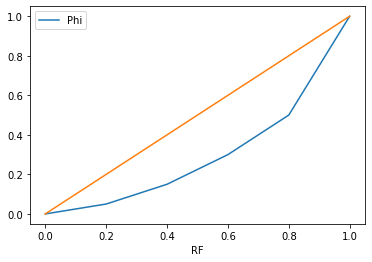

In [37]:
df.plot(x='RF',y='Phi')
plt.plot((0,1),(0,1))

In [38]:
df['Phi'][:-1].values

array([0.  , 0.05, 0.15, 0.3 , 0.5 ])

In [39]:
df['Phi'][1:].values

array([0.05, 0.15, 0.3 , 0.5 , 1.  ])

$$\Sigma \Phi_n = \Phi_n + \Phi_{n-1}$$

In [40]:
SPhi = df['Phi'][1:].values + df['Phi'][:-1].values

In [41]:
SPhi

array([0.05, 0.2 , 0.45, 0.8 , 1.5 ])

In [42]:
SPhi = np.insert(SPhi, 0, 0.0)

In [43]:
SPhi

array([0.  , 0.05, 0.2 , 0.45, 0.8 , 1.5 ])

In [44]:
df['SPhi'] = SPhi

In [45]:
df

,x,Phi,RF,SPhi
0,0,0.00,0.0,0.00
1,5000,0.05,0.2,0.05
2,10000,0.15,0.4,0.20
3,15000,0.30,0.6,0.45
4,20000,0.50,0.8,0.80
5,50000,1.00,1.0,1.50


$$\Delta RF_n = RF_n - RF_{n-1}$$

In [46]:
DRF = df['RF'][1:].values - df['RF'][0:-1].values

In [47]:
DRF = np.insert(DRF, 0, 0.0)

In [48]:
df['DRF'] = DRF

In [49]:
df

,x,Phi,RF,SPhi,DRF
0,0,0.00,0.0,0.00,0.0
1,5000,0.05,0.2,0.05,0.2
2,10000,0.15,0.4,0.20,0.2
3,15000,0.30,0.6,0.45,0.2
4,20000,0.50,0.8,0.80,0.2
5,50000,1.00,1.0,1.50,0.2


In [50]:
df['SPhi_DRF'] = df['SPhi'] * df['DRF']

In [51]:
df

,x,Phi,RF,SPhi,DRF,SPhi_DRF
0,0,0.00,0.0,0.00,0.0,0.00
1,5000,0.05,0.2,0.05,0.2,0.01
2,10000,0.15,0.4,0.20,0.2,0.04
3,15000,0.30,0.6,0.45,0.2,0.09
4,20000,0.50,0.8,0.80,0.2,0.16
5,50000,1.00,1.0,1.50,0.2,0.30


In [52]:
Gini = 1 - df['SPhi_DRF'].sum()

In [53]:
Gini

0.4